In [1]:
# import necessary libraries and set up the environmet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

In [2]:
# read the data and display
ROOT_DIRECTORY = os.path.abspath('')
DF_PATH = os.path.join(ROOT_DIRECTORY,'coaster_db.csv')
df = pd.read_csv(DF_PATH)
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN


In [3]:
# check the datatypes numeric, string, datetime 
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [4]:
# check the insights about data
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [5]:
# only keep a few features that we are truly interested in

df = df[['coaster_name', 
#     'Length', 'Speed',
    'Location', 'Status',
#     'Opening date',
#        'Type', 
    'Manufacturer', 
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date', 
#     'Opened',
#     'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
#     'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
#     'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [6]:
# convert the date feature to proper format

df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [7]:
df = df.rename(columns = {'coaster_name':'Coaster_Name',
                    'year_introduced':'Year_Introduced',
                    'latitude':'Latitude',
                    'longitude':'Longitude',
                    'opening_date_clean':'Opening_Date_Clean',
                    'speed_mph':'Speed_mph',
                    'height_ft':'Height_ft',
                    'Inversions_clean':'Inversions',
                    'Gforce_clean':'Gforce'})


In [8]:
# check for the Null values 

df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
Latitude              275
Longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_mph             150
Height_ft             916
Inversions              0
Gforce                725
dtype: int64

In [9]:
# check for duplicated values

df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce


In [10]:
# an example of seeing the duplicates regarding a signle feature

df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,"Arrow Development (California and Florida)Dynamic Structures (2014 California rebuild)Vekoma (Paris, Tokyo)",1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [11]:
# investigate for some in depth information about duplications, why are some names repeated?
# in this case it was put online in a year then taken down then put online again and that is the reason for duplication

df.query('Coaster_Name=="Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [12]:
# get all the unique values for these columns that identify each individual roller coaster
# because another index column is produced after resetting the index, we drop the previous index column

df = df.loc[~df.duplicated(subset = ['Coaster_Name','Location','Opening_Date_Clean'])].reset_index(drop=True).copy()

In [13]:
#  most basic step toward univariate analysis. check the occurence frqeuency for each feature.

df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

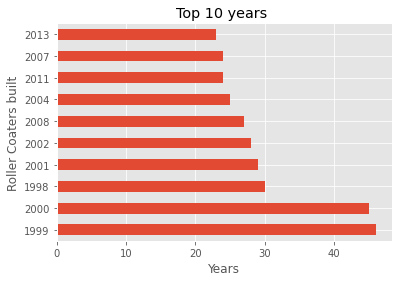

In [38]:
# plot top 10 years in which the most number of roller coasters were introduced

ax = df['Year_Introduced'].value_counts() \
.head(10) \
.plot(kind = 'barh')

ax.set_title('Top 10 years ')
ax.set_xlabel('Years')
ax.set_ylabel('Roller Coaters built')
plt.show()

Text(0.5, 0, 'Speed (mph)')

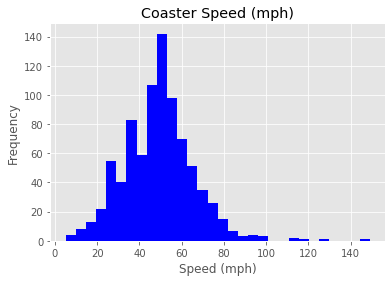

In [15]:
# plot the histogram of roller coaster speeed variation clearly around 50 mph is the most common speed

ax = df['Speed_mph'].plot(kind ='hist',
                          bins = 30,
                          title = 'Coaster Speed (mph)',color = 'blue')
ax.set_xlabel('Speed (mph)')

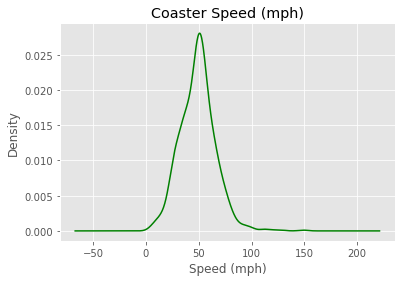

In [16]:
# this density plot is more smooth version of previous plot and less cluttered. Same deduction.

ax = df['Speed_mph'].plot(kind ='kde',
                          title = 'Coaster Speed (mph)',color = 'green')
ax.set_xlabel('Speed (mph)')
plt.show()

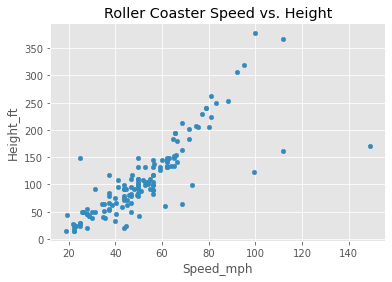

In [17]:
# This scatter plot clearly illustrates a direct correlation between roller coaster speed and height

df.plot(kind='scatter',x='Speed_mph', y='Height_ft', title = 'Roller Coaster Speed vs. Height')
plt.show()

<AxesSubplot:xlabel='Speed_mph', ylabel='Height_ft'>

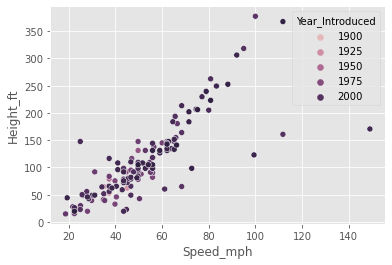

In [18]:
# With the help of Seaborn we can now investigate the role that the progress of time has played in
# developing faster roller coasters which operate on higher altitudes

sns.scatterplot(x='Speed_mph',y='Height_ft',data=df, hue ='Year_Introduced')

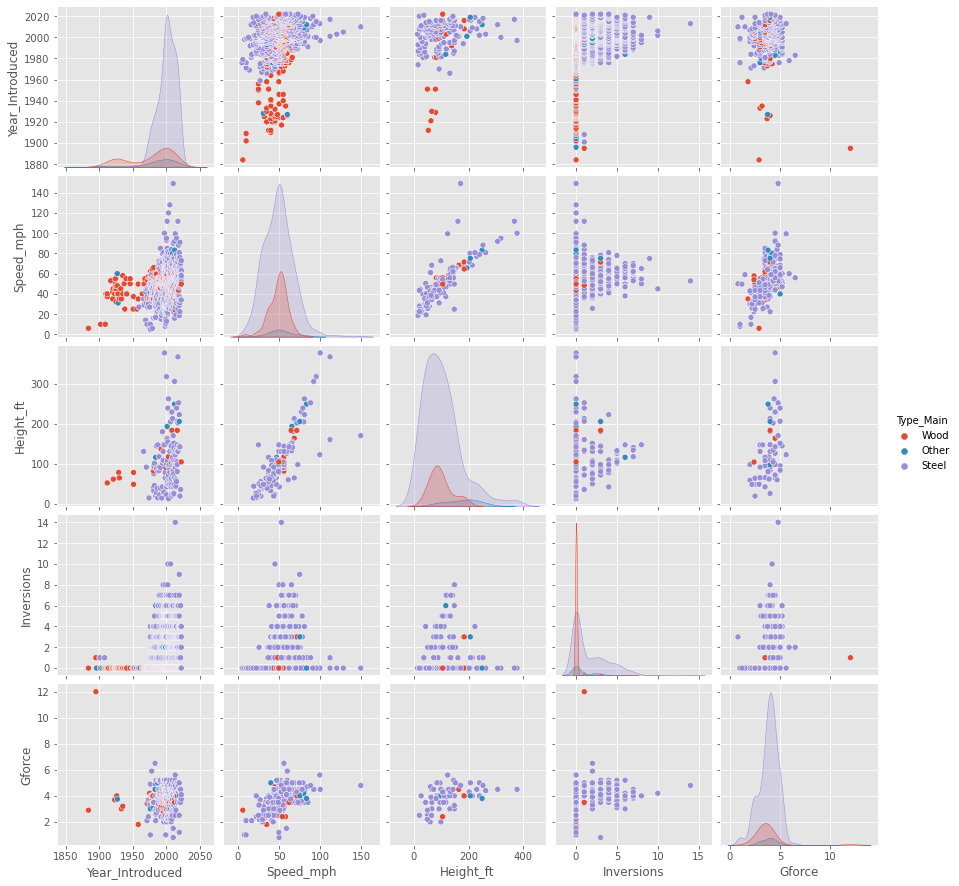

In [19]:
# pairwise comparison of some dominant features leads to amazing insights in our data.
# with the help of Seaborn we can even investigate the categorical feature "Material" among all plots

sns.pairplot(df,
            vars = ['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce'],
            hue ='Type_Main')
plt.show()

In [20]:
# construct a correlation Matrix for numerical features. The high correlation between Speed and Height is proven.

df_corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


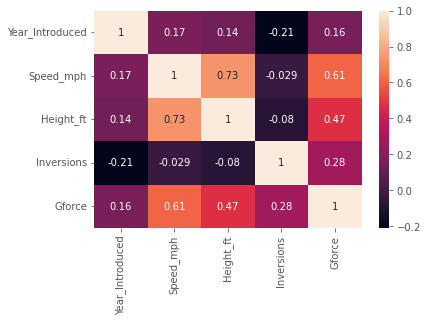

In [21]:
# A nice heatmap to help visuallize the correlation Matrix

sns.heatmap(df_corr, annot = True)
plt.show()

In [23]:
# for each location in dataset, there could be multiple Roller Coasters
# What are the locations with the fastest roller coasters? answer should include locations which host
# a minimum of 10 roller coasters

df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [32]:
# remove the "other" location because it is not a real location.
#  group by location, look into 'Speed_mph' column, calculate mean speed and count of roller coasters for each location
# display the locations which host at least 10 roller coasters and sort the results by mean speed (mph)

df.query('Location != "Other"') \
        .groupby('Location') \
        ['Speed_mph'] \
        .agg(['mean','count']) \
        .query('count >= 10') \
        .sort_values('mean')


,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17
Cedar Point,57.833333,18


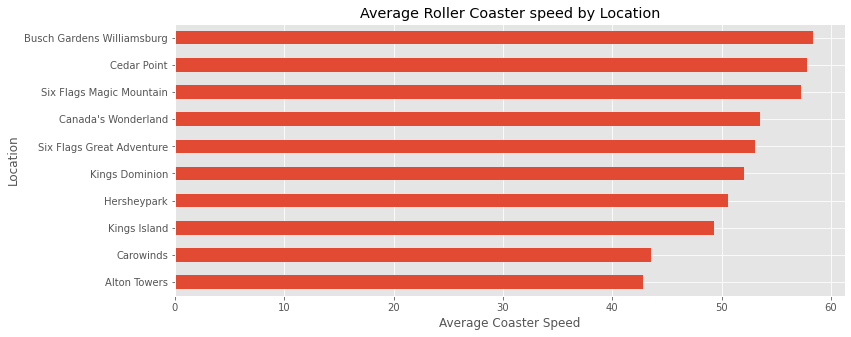

In [37]:
# plot the mean speed only

ax = df.query('Location != "Other"') \
        .groupby('Location') \
        ['Speed_mph'] \
        .agg(['mean','count']) \
        .query('count >= 10') \
        .sort_values('mean')['mean'] \
        .plot(kind='barh', figsize=(12,5), title = 'Average Roller Coaster speed by Location')

ax.set_xlabel('Average Coaster Speed')
plt.show()